In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Random Walk

In [33]:
# First, define the number of steps
n = 100

## For-loop impementation

In [52]:
np.random.seed(42) # seed for reproducibility
# For each step, we will sample a random number between 0 and 1,
# and we will append the last element of the list plus 1 if the
# number is greater than 0.5, and the last element minus 1 otherwise.
# We will start from 0.
walk = [0] 
for i in range(n):
    if np.random.rand() > 0.5:
        walk.append(walk[-1] + 1)
    else:
        walk.append(walk[-1] - 1)

In [53]:
print(walk[:10]) # Print the first 10 steps

[0, -1, 0, 1, 2, 1, 0, -1, 0, 1]


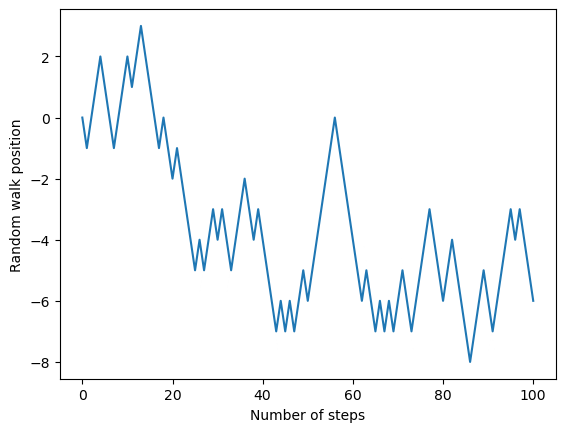

In [54]:
plt.plot(walk)
plt.xlabel('Number of steps')
plt.ylabel('Random walk position')
plt.show()

## Vectorized implementation

In [67]:
np.random.seed(42) # seed for reproducibility
# Here, instead of sampling a random number between 0 and 1 each time,
# we will sample all the random walk movements at once. To do this, we
# will use np.random.randint function, which will return an array of n
# random integers between 0 and 1, and then shift the values to -1 and 1.
# Finally, we will use the np.cumsum function to compute the cumulative sum
# of the random walk movements.
movements = np.random.randint(0, 2, size=n) * 2 - 1

# Before computing the cumulative sum, we need to append the starting point
# of the random walk, which is 0.
walk = [0]
movements = np.append(0, movements)
walk = np.cumsum(movements)


In [69]:
walk[:10] # Print the first 10 steps

array([ 0, -1,  0, -1, -2, -3, -2, -3, -4, -5])

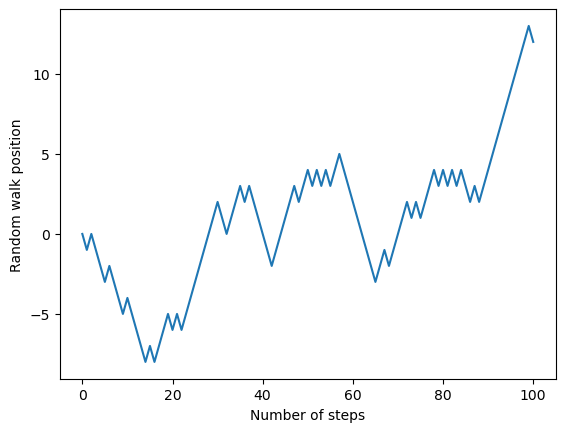

In [70]:
plt.plot(walk)
plt.xlabel('Number of steps')
plt.ylabel('Random walk position')
plt.show()

## Running many random walk trajectories 

In [134]:
np.random.seed(42) # seed for reproducibility
num_walks = 1000
num_steps = 1000
# We pass the tuple (num_walks, n) to the np.random.randint function to
# generate a 2D array with num_walks rows and n columns. Each row will
# represent a random walk.
movements = np.random.randint(0, 2, size=(num_walks, num_steps)) * 2 - 1

# We append the starting point of the random walks, which is 0.
walks = np.zeros((num_walks, 1))

# We concatenate the starting point with the random walk movements.
# Since the starting point is a 2D array, we need to (1) use np.concatenate
# to concatenate the arrays and (2) pass the axis=1 argument to concatenate
# the arrays along the columns.
movements = np.concatenate((walks, movements), axis=1)

# We compute the cumulative sum of the random walk movements. Again, 
# we need to pass the axis=1 argument to compute the cumulative sum along
# the columns.
walks = np.cumsum(movements, axis=1)

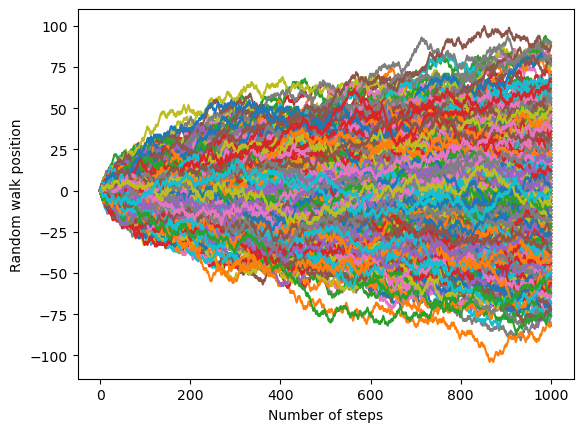

In [135]:
plt.plot(walks.T)
plt.xlabel('Number of steps')
plt.ylabel('Random walk position')
plt.show()

## Computing the historam of final states

In [136]:
final_states_after_10_steps = walks[:, 10]
final_states_after_100_steps = walks[:, 100]
final_states_after_1000_steps = walks[:, 1000] # Last row of the walks array

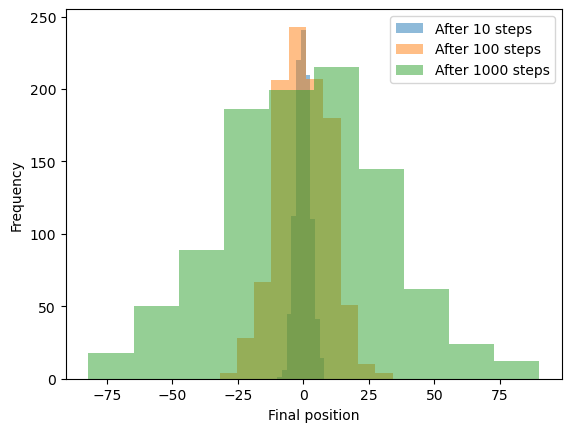

In [137]:
plt.hist(final_states_after_10_steps, alpha=0.5, label='After 10 steps')
plt.hist(final_states_after_100_steps, alpha=0.5, label='After 100 steps')
plt.hist(final_states_after_1000_steps, alpha=0.5, label='After 1000 steps')
plt.xlabel('Final position')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Computing the mean and variance of final states

In [138]:
print("After 10 steps")
print("Mean: ", np.mean(final_states_after_10_steps))
print("Standard deviation: ", np.std(final_states_after_10_steps))

print("After 100 steps")
print("Mean: ", np.mean(final_states_after_100_steps))
print("Standard deviation: ", np.std(final_states_after_100_steps))

print("After 1000 steps")
print("Mean: ", np.mean(final_states_after_1000_steps))
print("Standard deviation: ", np.std(final_states_after_1000_steps))


After 10 steps
Mean:  0.002
Standard deviation:  3.122178085888119
After 100 steps
Mean:  0.008
Standard deviation:  10.046289663353331
After 1000 steps
Mean:  -0.378
Standard deviation:  30.979301412394694


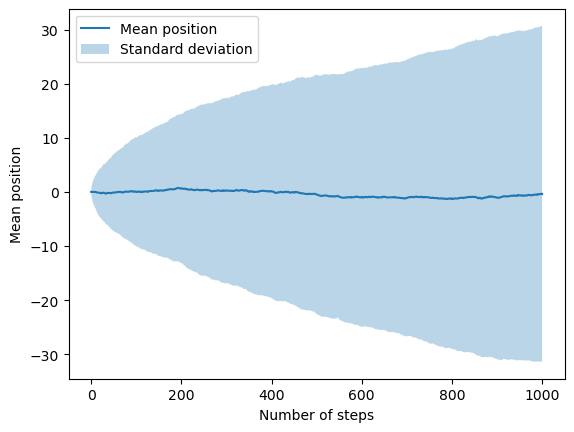

In [148]:
walks_mean = np.mean(walks, axis=0)
walks_std = np.std(walks, axis=0)

plt.plot(np.mean(walks, axis=0), label='Mean position')
plt.fill_between(range(num_steps+1), walks_mean-walks_std, walks_mean+walks_std, alpha=0.3, label='Standard deviation')
plt.xlabel('Number of steps')
plt.ylabel('Mean position')
plt.legend()
plt.show()

## Random walk with different probabilities

In [159]:
p_left = 0.6
p_right = 1 - p_left

np.random.seed(42) # seed for reproducibility

# We sample the random walk movements using the np.random.choice function.
# We pass the array [-1, 1] as the first argument to sample the movements
# -1 and 1, and the array [p_left, p_right] as the p argument to sample the
# movements with probability p_left and p_right.
movements = np.random.choice([-1, 1], size=(num_walks, num_steps), p=[p_left, p_right])

# We append the starting point of the random walks, which is 0.
walks = np.zeros((num_walks, 1))

# We concatenate the starting point with the random walk movements.
movements = np.concatenate((walks, movements), axis=1)

# We compute the cumulative sum of the random walk movements.
walks = np.cumsum(movements, axis=1)

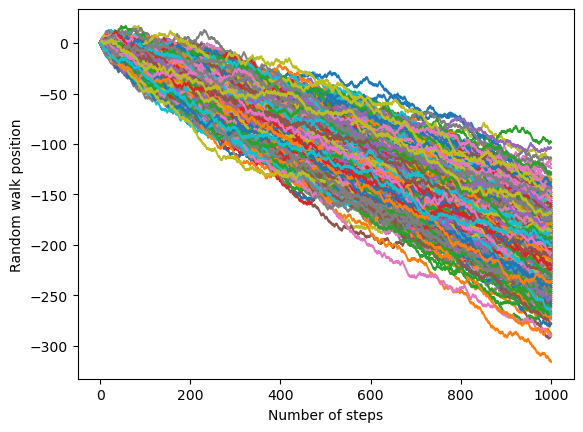

In [160]:
plt.plot(walks.T)
plt.xlabel('Number of steps')
plt.ylabel('Random walk position')
plt.show()

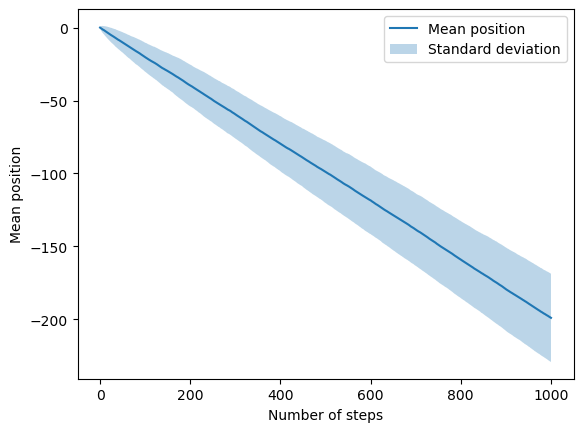

In [161]:
walks_mean = np.mean(walks, axis=0)
walks_std = np.std(walks, axis=0)

plt.plot(np.mean(walks, axis=0), label='Mean position')
plt.fill_between(range(num_steps+1), walks_mean-walks_std, walks_mean+walks_std, alpha=0.3, label='Standard deviation')
plt.xlabel('Number of steps')
plt.ylabel('Mean position')
plt.legend()
plt.show()

# Task 2: Studying random numbers

## Comparing our own randomly printed number with the numpy random number

639
[6 1 2 8 7 1 8 5 6 7]
(np.int64(1), np.int64(8))
4.467918622848201 4.458528951486698
2.3306800245399066 2.298754856950671


[]

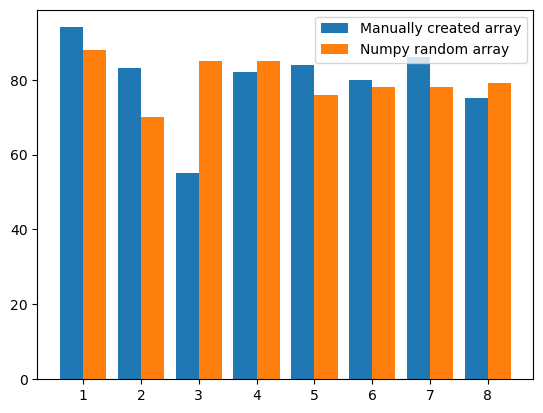

In [177]:
import numpy as np
import matplotlib.pyplot as plt
#the long number here was typed by hand
a = np.array(list(str(612871856723467851234678512438675123687512347651276124876512468751236781268751248671254827654128764512876451818178518475123874518451817548175481254118418725347612547125445876515436818127635436182843654172645436278761234362152634738126765787612375641235646754756145761347568123457814567814567134276512346574136823416572346578123465743567812671237684521873645612345126745182764518245212768867127652348765124876514256732148765486715328761245743654183567132458125467123245126754182458172453652612834635462718721888181851871254637218723453644536271217283634536271487213867451234518278182716354182765412873516722546534536217284712874518672354187)),dtype=int)
#check the size of the array, and that it is indeed a numpy array of integers from 1 to 8
print(np.size(a))
print(a[:10])
print((np.min(a),np.max(a)))
# create an array of the same size with computer-generated random numbers
b = np.random.randint(1,8+1,size=np.size(a))
#get the mean and std of both
print(np.mean(a),np.mean(b))
print(np.std(a),np.std(b))
#plot histograms of both, with bins chosen such that each integral has its own bin)
plt.hist([a,b],bins=np.arange(1-.5,8+1.5))
plt.legend(['Manually created array','Numpy random array'])
plt.plot()

## Analyzing the distance between the adjacent random numbers

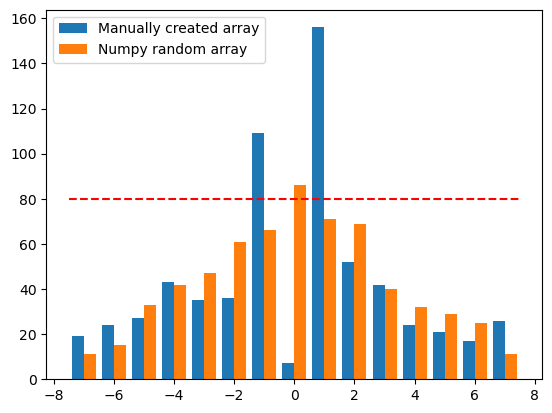

In [176]:
#look at the distance between consecutive numbers
#a[1:0] is the array a taken from the SECOND entry to the end. a[:-1] is from the first entry to the penultimate entry
aDistance = a[1:]-a[:-1]
bDistance = b[1:]-b[:-1]
#get the expected number of times that distance 0 (i.e. the number is the same as the previous number) occurs
threshold = np.size(a)/8
#plot a histogram of both distance distributions
plt.hist([aDistance,bDistance],bins=np.arange(-7.5,7+1.5))
plt.legend(['Manually created array','Numpy random array'])
plt.hlines(threshold, -7.5, 7.5, colors='r', linestyles='dashed')
plt.show()

## Analyzing the probablity of 6 coming after 5 or 7

In [200]:
print('Target probability: ', 2/7)
print('Target number of events: ', 2/7*np.size(a))

# Calculating the number of events, when 6 comes after 5
# To do this, we identfy the number of times the difference between the
# consecutive numbers is 1 and the number is 5.
a_six_after_five = np.sum(aDistance[a[1:] == 5] == 1)
b_six_after_five = np.sum(bDistance[b[1:] == 5] == 1)
# Calculating the number of events, when 6 comes after 7.
# To do this, we identfy the number of times the difference between the
# consecutive numbers is -1 and the number is 7.
a_six_after_seven = np.sum(aDistance[a[1:] == 7] == -1)
b_six_after_seven = np.sum(bDistance[b[1:] == 7] == -1)
print("Actual number of events for a manual random array: ", a_six_after_five + a_six_after_seven)
print("Actual number of events for a numpy random array: ", b_six_after_five + b_six_after_seven)



Target probability:  0.2857142857142857
Target number of events:  182.57142857142856
Actual number of events for a manual random array:  52
Actual number of events for a numpy random array:  16


## Analyzing the probability of getting 3 identical numbers in a row

In [222]:
print('Target probability: ', 1/36)
print('Target number of events: ', 1/36*np.size(a))

# Calculating the number of events of getting 3 identical numbers in a row.
# To do this, we identify the number of times, when we see two or more zeros
# in a row in the array aDistance or bDistance.

print('Actual number of events for a manual random array: ', np.sum(np.logical_and(aDistance[1:]==0, aDistance[:-1]==0)))
print('Actual number of events for a numpy random array: ', np.sum(np.logical_and(bDistance[1:]==0, bDistance[:-1]==0)))


Target probability:  0.027777777777777776
Target number of events:  17.75
Actual number of events for a manual random array:  1
Actual number of events for a numpy random array:  13
